## Python version

In [1]:
from platform import python_version
print(python_version())

3.6.5


## Import Libraries

In [2]:
import tensorflow
tensorflow.random.set_seed(1234)

/home/michael/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/michael/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/michael/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/michael/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework

In [3]:
import numpy as np
from numpy.random import seed
seed(1)

import os
import csv
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler

dtypes = {
        'IsCanceled':                                    'float64',
        'LeadTime':                                          'float64',
        'StaysInWeekendNights':                                     'float64',
        'StaysInWeekNights':                                     'float64',
        'Adults':                            'float64',
        'Children':                            'float64',
        'Babies':                                  'float64',
        'Meal':                                    'category',
        'Country':                                               'category',
        'MarketSegment':                                    'category',
        'DistributionChannel':                                       'category',
        'IsRepeatedGuest':                               'float64',
        'PreviousCancellations':                                    'float64',
        'PreviousBookingsNotCanceled':                          'float64',
        'ReservedRoomType':                                             'category',
        'AssignedRoomType':                                            'category',
        'BookingChanges':                                                'float64',
        'DepositType':                                              'category',
        'Agent':                                              'category',
        'Company':                                 'category',
        'DaysInWaitingList':                                           'float64',
        'CustomerType':                                           'category',
        'ADR':                                          'float64',
        'RequiredCarParkingSpaces':                                      'float64',
        'TotalOfSpecialRequests':                                              'float64',
        'ReservationStatus':                                                'category'
        }

/home/michael/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Import and Manipulation

In [4]:
train_df = pd.read_csv("H1full.csv", dtype=dtypes, converters={'ArrivalDateWeekNumber': '{:0>2}'.format})

In [5]:
a=train_df.head()
b=train_df
b
c=b.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending=True)
c=pd.DataFrame(c)
c
type(c)

pandas.core.frame.DataFrame

In [6]:
from pandas import DataFrame  

df = DataFrame(c, columns= ['ArrivalDateYear', 'ArrivalDateWeekNumber']) 
df

,ArrivalDateYear,ArrivalDateWeekNumber
0,2015,27
1,2015,27
2,2015,27
3,2015,27
4,2015,27
...,...,...
40055,2017,35
40056,2017,35
40057,2017,35
40058,2017,35


In [7]:
# https://datatofish.com/concatenate-values-python/

df1 = df['ArrivalDateYear'].map(str) + df['ArrivalDateWeekNumber'].map(str)
print (df1)
df1=pd.DataFrame(df1)

0        201527
1        201527
2        201527
3        201527
4        201527
          ...  
40055    201735
40056    201735
40057    201735
40058    201735
40059    201735
Length: 40060, dtype: object


In [8]:
df2 = DataFrame(c, columns= ['ADR']) 
df2

,ADR
0,0.00
1,0.00
2,75.00
3,75.00
4,98.00
...,...
40055,89.75
40056,202.27
40057,153.57
40058,112.80


In [9]:
type(df1)

pandas.core.frame.DataFrame

In [10]:
df3=pd.concat([df1, df2], axis = 1)
df3
df3.columns = ['FullDate', 'ADR']

In [11]:
df3
df3.sort_values(['FullDate','ADR'], ascending=True)

,FullDate,ADR
0,201527,0.00
1,201527,0.00
125,201527,0.00
14463,201527,4.00
81,201527,55.68
...,...,...
13770,201735,328.00
13745,201735,341.00
39847,201735,344.67
39870,201735,351.00


In [12]:
df4 = df3.groupby('FullDate').agg("mean")
df4
df4.sort_values(['FullDate'], ascending=True)

,ADR
FullDate,
201527,100.099096
201528,110.399188
201529,128.112023
201530,140.592271
201531,145.563833
...,...
201731,208.712512
201732,211.528351
201733,211.162040


In [13]:
tseries=df4['ADR']
tseries

FullDate
201527    100.099096
201528    110.399188
201529    128.112023
201530    140.592271
201531    145.563833
             ...    
201731    208.712512
201732    211.528351
201733    211.162040
201734    210.284883
201735    186.204007
Name: ADR, Length: 115, dtype: float64

In [14]:
# https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.acorr_ljungbox.html
res = sm.tsa.ARMA(tseries, (1,1)).fit(disp=-1)
sm.stats.acorr_ljungbox(res.resid, lags=[10])

/home/michael/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(array([5.97004935]), array([0.81777326]))

In [15]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(tseries)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.226203
p-value: 0.662224
Critical Values:
	1%: -3.489
	5%: -2.887
	10%: -2.580


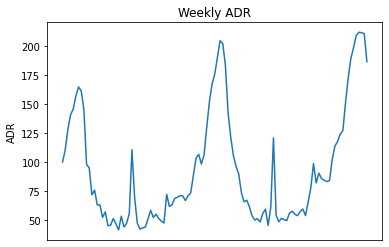

In [16]:
import matplotlib.pyplot as plt
plt.plot(tseries)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('ADR')
plt.title("Weekly ADR")
plt.show()

In [17]:
df=pd.DataFrame(tseries)
df

,ADR
FullDate,
201527,100.099096
201528,110.399188
201529,128.112023
201530,140.592271
201531,145.563833
...,...
201731,208.712512
201732,211.528351
201733,211.162040


In [18]:
df.to_csv("weekly adr h1.csv", sep='\t', encoding='utf-8')

In [19]:
df = df[:100]

In [20]:
df

,ADR
FullDate,
201527,100.099096
201528,110.399188
201529,128.112023
201530,140.592271
201531,145.563833
...,...
201716,82.126727
201717,90.483817
201718,85.819405


### Form dataset matrix

In [21]:
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [22]:
df

,ADR
FullDate,
201527,100.099096
201528,110.399188
201529,128.112023
201530,140.592271
201531,145.563833
...,...
201716,82.126727
201717,90.483817
201718,85.819405


## Normalize dataset with MinMaxScaler

In [23]:
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)
df

array([[0.35915778],
       [0.42256282],
       [0.53159902],
       [0.6084246 ],
       [0.63902841],
       [0.70858066],
       [0.75574219],
       [0.7348692 ],
       [0.63555916],
       [0.34629856],
       [0.32723163],
       [0.18514608],
       [0.21056117],
       [0.13243974],
       [0.1321469 ],
       [0.06636683],
       [0.09516089],
       [0.02223529],
       [0.02497857],
       [0.06036494],
       [0.03174555],
       [0.        ],
       [0.07264622],
       [0.01577971],
       [0.03508942],
       [0.08660442],
       [0.42389599],
       [0.17160055],
       [0.03557547],
       [0.00426488],
       [0.0107102 ],
       [0.01544127],
       [0.05726066],
       [0.10383914],
       [0.06606771],
       [0.08345677],
       [0.06042365],
       [0.04667078],
       [0.03650144],
       [0.18829055],
       [0.12438214],
       [0.13248013],
       [0.16620484],
       [0.17270111],
       [0.18086367],
       [0.18034879],
       [0.15518062],
       [0.180

## Configure LSTM model

In [24]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# Training and Validation data partition
train_size = int(len(df) * 0.8)
val_size = len(df) - train_size
train, val = df[0:train_size,:], df[train_size:len(df),:]

# Number of previous
previous = 5
X_train, Y_train = create_dataset(train, previous)
X_val, Y_val = create_dataset(val, previous)

In [25]:
X_train

array([[0.35915778, 0.42256282, 0.53159902, 0.6084246 , 0.63902841],
       [0.42256282, 0.53159902, 0.6084246 , 0.63902841, 0.70858066],
       [0.53159902, 0.6084246 , 0.63902841, 0.70858066, 0.75574219],
       [0.6084246 , 0.63902841, 0.70858066, 0.75574219, 0.7348692 ],
       [0.63902841, 0.70858066, 0.75574219, 0.7348692 , 0.63555916],
       [0.70858066, 0.75574219, 0.7348692 , 0.63555916, 0.34629856],
       [0.75574219, 0.7348692 , 0.63555916, 0.34629856, 0.32723163],
       [0.7348692 , 0.63555916, 0.34629856, 0.32723163, 0.18514608],
       [0.63555916, 0.34629856, 0.32723163, 0.18514608, 0.21056117],
       [0.34629856, 0.32723163, 0.18514608, 0.21056117, 0.13243974],
       [0.32723163, 0.18514608, 0.21056117, 0.13243974, 0.1321469 ],
       [0.18514608, 0.21056117, 0.13243974, 0.1321469 , 0.06636683],
       [0.21056117, 0.13243974, 0.1321469 , 0.06636683, 0.09516089],
       [0.13243974, 0.1321469 , 0.06636683, 0.09516089, 0.02223529],
       [0.1321469 , 0.06636683, 0.

In [26]:
Y_train

array([0.70858066, 0.75574219, 0.7348692 , 0.63555916, 0.34629856,
       0.32723163, 0.18514608, 0.21056117, 0.13243974, 0.1321469 ,
       0.06636683, 0.09516089, 0.02223529, 0.02497857, 0.06036494,
       0.03174555, 0.        , 0.07264622, 0.01577971, 0.03508942,
       0.08660442, 0.42389599, 0.17160055, 0.03557547, 0.00426488,
       0.0107102 , 0.01544127, 0.05726066, 0.10383914, 0.06606771,
       0.08345677, 0.06042365, 0.04667078, 0.03650144, 0.18829055,
       0.12438214, 0.13248013, 0.16620484, 0.17270111, 0.18086367,
       0.18034879, 0.15518062, 0.18007011, 0.19510582, 0.28795589,
       0.37879187, 0.40002117, 0.34828686, 0.3957591 , 0.54170226,
       0.67690781, 0.77128436, 0.82316665, 0.91084475, 1.        ,
       0.9860843 , 0.87005436, 0.61914988, 0.49061203, 0.39187411,
       0.33595669, 0.29452088, 0.19646456, 0.14820618, 0.15726342,
       0.12222412, 0.07324677, 0.05206859, 0.05937164, 0.04205497,
       0.0867528 , 0.10976084, 0.0236608 , 0.11987636])

Train on 59 samples, validate on 15 samples
Epoch 1/100
59/59 - 1s - loss: 0.0689 - val_loss: 0.0027
Epoch 2/100
59/59 - 0s - loss: 0.0431 - val_loss: 0.0118
Epoch 3/100
59/59 - 0s - loss: 0.0334 - val_loss: 0.0196
Epoch 4/100
59/59 - 0s - loss: 0.0293 - val_loss: 0.0243
Epoch 5/100
59/59 - 0s - loss: 0.0273 - val_loss: 0.0266
Epoch 6/100
59/59 - 0s - loss: 0.0260 - val_loss: 0.0258
Epoch 7/100
59/59 - 0s - loss: 0.0251 - val_loss: 0.0278
Epoch 8/100
59/59 - 0s - loss: 0.0239 - val_loss: 0.0266
Epoch 9/100
59/59 - 0s - loss: 0.0232 - val_loss: 0.0259
Epoch 10/100
59/59 - 0s - loss: 0.0226 - val_loss: 0.0238
Epoch 11/100
59/59 - 0s - loss: 0.0216 - val_loss: 0.0228
Epoch 12/100
59/59 - 0s - loss: 0.0210 - val_loss: 0.0217
Epoch 13/100
59/59 - 0s - loss: 0.0202 - val_loss: 0.0222
Epoch 14/100
59/59 - 0s - loss: 0.0197 - val_loss: 0.0189
Epoch 15/100
59/59 - 0s - loss: 0.0191 - val_loss: 0.0165
Epoch 16/100
59/59 - 0s - loss: 0.0187 - val_loss: 0.0160
Epoch 17/100
59/59 - 0s - loss: 0.017

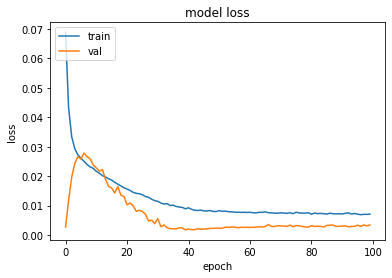

In [27]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))

# Generate LSTM network
model = tf.keras.Sequential()
model.add(LSTM(4, input_shape=(1, previous)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=1, verbose=2)


# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [28]:
# Generate predictions
trainpred = model.predict(X_train)
valpred = model.predict(X_val)

In [29]:
trainpred

array([[0.65968996],
       [0.7098784 ],
       [0.7365784 ],
       [0.68742186],
       [0.555992  ],
       [0.24605426],
       [0.21149224],
       [0.12786095],
       [0.15206714],
       [0.13836443],
       [0.11942466],
       [0.08545955],
       [0.09345098],
       [0.04482587],
       [0.03181396],
       [0.07205537],
       [0.03773072],
       [0.01529632],
       [0.07740569],
       [0.03028931],
       [0.03694337],
       [0.09538896],
       [0.38891703],
       [0.1959603 ],
       [0.03886826],
       [0.05605061],
       [0.01046192],
       [0.01915601],
       [0.05564345],
       [0.09987112],
       [0.07239851],
       [0.09024521],
       [0.07726065],
       [0.05443581],
       [0.05143609],
       [0.17451286],
       [0.13108683],
       [0.1292603 ],
       [0.18617986],
       [0.1713155 ],
       [0.18526721],
       [0.18887965],
       [0.16245154],
       [0.18361504],
       [0.20024681],
       [0.28597274],
       [0.3918243 ],
       [0.418

In [30]:
valpred

array([[0.05519623],
       [0.09304237],
       [0.10193679],
       [0.08861744],
       [0.08691752],
       [0.1033398 ],
       [0.11411618],
       [0.08469184],
       [0.14816594],
       [0.22405931],
       [0.3467331 ],
       [0.27096844],
       [0.30385947],
       [0.28998324]], dtype=float32)

In [31]:
# Convert predictions back to normal values
trainpred = scaler.inverse_transform(trainpred)
Y_train = scaler.inverse_transform([Y_train])
valpred = scaler.inverse_transform(valpred)
Y_val = scaler.inverse_transform([Y_val])
predictions = valpred

In [32]:
Y_train.shape

(1, 74)

In [33]:
Y_val.shape

(1, 14)

In [34]:
X_train.shape

(74, 1, 5)

In [35]:
X_val.shape

(14, 1, 5)

In [36]:
Y_train

array([[156.86253472, 164.52388406, 161.13308442, 145.00025559,
         98.01012626,  94.91272152,  71.83104911,  75.9597076 ,
         63.26895062,  63.22137856,  52.53546326,  57.21303342,
         45.36633466,  45.81197761,  51.56046154,  46.91126722,
         41.75423077,  53.55554455,  44.31763006,  47.45447674,
         55.82304196, 110.61576087,  69.63058824,  47.53343434,
         42.44705607,  43.49409326,  44.26265193,  51.0561747 ,
         58.62280778,  52.48687259,  55.3117096 ,  51.57      ,
         49.33585714,  47.68385787,  72.34186517,  61.96      ,
         63.27551163,  68.75405995,  69.8093736 ,  71.13537391,
         71.05173333,  66.96318584,  71.00646186,  73.449     ,
         88.53241117, 103.28863636, 106.73731778,  98.333125  ,
        106.04494737, 129.7532852 , 151.71730887, 167.04869565,
        175.47692771, 189.72015873, 204.20334975, 201.94275689,
        183.09379501, 142.33458333, 121.4537224 , 105.41383436,
         96.33009852,  89.59888889,  73.

In [37]:
Y_val

array([[56.18551429, 57.79941043, 55.27926087, 53.95722826, 57.43459459,
        59.7281459 , 54.04828244, 65.76393443, 78.04821622, 98.80672269,
        82.1267268 , 90.48381679, 85.81940503, 84.46819121]])

In [38]:
X_train

array([[[0.35915778, 0.42256282, 0.53159902, 0.6084246 , 0.63902841]],

       [[0.42256282, 0.53159902, 0.6084246 , 0.63902841, 0.70858066]],

       [[0.53159902, 0.6084246 , 0.63902841, 0.70858066, 0.75574219]],

       [[0.6084246 , 0.63902841, 0.70858066, 0.75574219, 0.7348692 ]],

       [[0.63902841, 0.70858066, 0.75574219, 0.7348692 , 0.63555916]],

       [[0.70858066, 0.75574219, 0.7348692 , 0.63555916, 0.34629856]],

       [[0.75574219, 0.7348692 , 0.63555916, 0.34629856, 0.32723163]],

       [[0.7348692 , 0.63555916, 0.34629856, 0.32723163, 0.18514608]],

       [[0.63555916, 0.34629856, 0.32723163, 0.18514608, 0.21056117]],

       [[0.34629856, 0.32723163, 0.18514608, 0.21056117, 0.13243974]],

       [[0.32723163, 0.18514608, 0.21056117, 0.13243974, 0.1321469 ]],

       [[0.18514608, 0.21056117, 0.13243974, 0.1321469 , 0.06636683]],

       [[0.21056117, 0.13243974, 0.1321469 , 0.06636683, 0.09516089]],

       [[0.13243974, 0.1321469 , 0.06636683, 0.09516089, 0.02223

In [39]:
X_val

array([[[0.07755818, 0.0428816 , 0.0612328 , 0.05401089, 0.04941732]],

       [[0.0428816 , 0.0612328 , 0.05401089, 0.04941732, 0.08883571]],

       [[0.0612328 , 0.05401089, 0.04941732, 0.08883571, 0.09877049]],

       [[0.05401089, 0.04941732, 0.08883571, 0.09877049, 0.08325702]],

       [[0.04941732, 0.08883571, 0.09877049, 0.08325702, 0.07511889]],

       [[0.08883571, 0.09877049, 0.08325702, 0.07511889, 0.09652477]],

       [[0.09877049, 0.08325702, 0.07511889, 0.09652477, 0.11064335]],

       [[0.08325702, 0.07511889, 0.09652477, 0.11064335, 0.0756794 ]],

       [[0.07511889, 0.09652477, 0.11064335, 0.0756794 , 0.1477983 ]],

       [[0.09652477, 0.11064335, 0.0756794 , 0.1477983 , 0.22341756]],

       [[0.11064335, 0.0756794 , 0.1477983 , 0.22341756, 0.35120222]],

       [[0.0756794 , 0.1477983 , 0.22341756, 0.35120222, 0.24852395]],

       [[0.1477983 , 0.22341756, 0.35120222, 0.24852395, 0.2999683 ]],

       [[0.22341756, 0.35120222, 0.24852395, 0.2999683 , 0.27125

In [40]:
import math
from sklearn.metrics import mean_squared_error

# calculate RMSE
trainScore = math.sqrt(mean_squared_error(Y_train[0], trainpred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
valScore = math.sqrt(mean_squared_error(Y_val[0], valpred[:,0]))
print('Validation Score: %.2f RMSE' % (valScore))

Train Score: 12.71 RMSE
Validation Score: 8.83 RMSE


In [41]:
# Train predictions
trainpredPlot = np.empty_like(df)
trainpredPlot[:, :] = np.nan
trainpredPlot[previous:len(trainpred)+previous, :] = trainpred

In [42]:
# Validation predictions
valpredPlot = np.empty_like(df)
valpredPlot[:, :] = np.nan
valpredPlot[len(trainpred)+(previous*2)+1:len(df)-1, :] = valpred

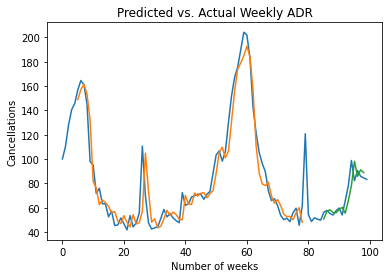

In [43]:
# Plot all predictions
inversetransform, =plt.plot(scaler.inverse_transform(df))
trainpred, =plt.plot(trainpredPlot)
valpred, =plt.plot(valpredPlot)
plt.xlabel('Number of weeks')
plt.ylabel('Cancellations')
plt.title("Predicted vs. Actual Weekly ADR")
plt.show()

In [44]:
Y_val=Y_val.reshape(-1)
Y_val.shape
Y_val=pd.Series(Y_val)

In [45]:
Y_val

0     56.185514
1     57.799410
2     55.279261
3     53.957228
4     57.434595
5     59.728146
6     54.048282
7     65.763934
8     78.048216
9     98.806723
10    82.126727
11    90.483817
12    85.819405
13    84.468191
dtype: float64

In [46]:
np.mean(Y_val)

69.99638928280858

In [47]:
predictions=predictions.reshape(-1)
predictions.shape
predictions=pd.Series(predictions)

In [48]:
predictions

0     50.720810
1     56.868881
2     58.313774
3     56.150055
4     55.873905
5     58.541691
6     60.292305
7     55.512348
8     65.823654
9     78.152466
10    98.080719
11    85.772812
12    91.115936
13    88.861748
dtype: float32

In [49]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [50]:
mda(Y_val, predictions)

0.8571428571428571

In [51]:
# https://machinelearningmastery.com/time-series-forecasting-performance-measures-with-python/

from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(Y_val, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 8.834956


In [52]:
forecast_error = (predictions-Y_val)
forecast_error

0     -5.464704
1     -0.930529
2      3.034513
3      2.192827
4     -1.560689
5     -1.186455
6      6.244023
7    -10.251586
8    -12.224562
9    -20.654257
10    15.953992
11    -4.711005
12     5.296531
13     4.393557
dtype: float64

In [53]:
mean_forecast_error = np.mean(forecast_error)
mean_forecast_error

-1.419167548625413

In [54]:
X_train

array([[[0.35915778, 0.42256282, 0.53159902, 0.6084246 , 0.63902841]],

       [[0.42256282, 0.53159902, 0.6084246 , 0.63902841, 0.70858066]],

       [[0.53159902, 0.6084246 , 0.63902841, 0.70858066, 0.75574219]],

       [[0.6084246 , 0.63902841, 0.70858066, 0.75574219, 0.7348692 ]],

       [[0.63902841, 0.70858066, 0.75574219, 0.7348692 , 0.63555916]],

       [[0.70858066, 0.75574219, 0.7348692 , 0.63555916, 0.34629856]],

       [[0.75574219, 0.7348692 , 0.63555916, 0.34629856, 0.32723163]],

       [[0.7348692 , 0.63555916, 0.34629856, 0.32723163, 0.18514608]],

       [[0.63555916, 0.34629856, 0.32723163, 0.18514608, 0.21056117]],

       [[0.34629856, 0.32723163, 0.18514608, 0.21056117, 0.13243974]],

       [[0.32723163, 0.18514608, 0.21056117, 0.13243974, 0.1321469 ]],

       [[0.18514608, 0.21056117, 0.13243974, 0.1321469 , 0.06636683]],

       [[0.21056117, 0.13243974, 0.1321469 , 0.06636683, 0.09516089]],

       [[0.13243974, 0.1321469 , 0.06636683, 0.09516089, 0.02223

In [55]:
X_train.shape

(74, 1, 5)

## Validate Predictions on Test Data

In [56]:
Xnew = np.array([tseries.iloc[95:100],tseries.iloc[96:101],tseries.iloc[97:102],tseries.iloc[98:103],tseries.iloc[99:104],tseries.iloc[100:105],tseries.iloc[101:106],tseries.iloc[102:107],tseries.iloc[103:108],tseries.iloc[104:109],tseries.iloc[105:110],tseries.iloc[106:111],tseries.iloc[107:112],tseries.iloc[108:113],tseries.iloc[109:114]])

In [57]:
Xnew

array([[ 82.1267268 ,  90.48381679,  85.81940503,  84.46819121,
         83.25621451],
       [ 90.48381679,  85.81940503,  84.46819121,  83.25621451,
         84.12304147],
       [ 85.81940503,  84.46819121,  83.25621451,  84.12304147,
        102.08452794],
       [ 84.46819121,  83.25621451,  84.12304147, 102.08452794,
        113.74824022],
       [ 83.25621451,  84.12304147, 102.08452794, 113.74824022,
        117.55218509],
       [ 84.12304147, 102.08452794, 113.74824022, 117.55218509,
        124.05833795],
       [102.08452794, 113.74824022, 117.55218509, 124.05833795,
        127.02865337],
       [113.74824022, 117.55218509, 124.05833795, 127.02865337,
        151.23568966],
       [117.55218509, 124.05833795, 127.02865337, 151.23568966,
        172.26865909],
       [124.05833795, 127.02865337, 151.23568966, 172.26865909,
        189.16831978],
       [127.02865337, 151.23568966, 172.26865909, 189.16831978,
        198.22268542],
       [151.23568966, 172.26865909, 189.168

In [58]:
Xnew = scaler.fit_transform(Xnew)
Xnew
Xnewformat = np.reshape(Xnew, (Xnew.shape[0], 1, Xnew.shape[1]))
ynew=model.predict(Xnewformat)

In [59]:
Xnew.shape

(15, 5)

In [60]:
ynew

array([[0.02153895],
       [0.0157201 ],
       [0.12966183],
       [0.22085814],
       [0.26296526],
       [0.33762595],
       [0.35830092],
       [0.54184073],
       [0.73585206],
       [0.8718423 ],
       [0.92918825],
       [0.9334069 ],
       [0.8861607 ],
       [0.81483454],
       [0.76510745]], dtype=float32)

In [61]:
type(ynew)

numpy.ndarray

In [62]:
ynew.shape

(15, 1)

In [63]:
actual = tseries.iloc[100:115]
actual

FullDate
201721     84.123041
201722    102.084528
201723    113.748240
201724    117.552185
201725    124.058338
201726    127.028653
201727    151.235690
201728    172.268659
201729    189.168320
201730    198.222685
201731    208.712512
201732    211.528351
201733    211.162040
201734    210.284883
201735    186.204007
Name: ADR, dtype: float64

In [64]:
actual = np.array(actual)
actual

array([ 84.12304147, 102.08452794, 113.74824022, 117.55218509,
       124.05833795, 127.02865337, 151.23568966, 172.26865909,
       189.16831978, 198.22268542, 208.71251185, 211.52835052,
       211.16204036, 210.28488251, 186.20400722])

In [65]:
actual=actual.reshape(15,-1)
actual.shape

(15, 1)

In [66]:
actual

array([[ 84.12304147],
       [102.08452794],
       [113.74824022],
       [117.55218509],
       [124.05833795],
       [127.02865337],
       [151.23568966],
       [172.26865909],
       [189.16831978],
       [198.22268542],
       [208.71251185],
       [211.52835052],
       [211.16204036],
       [210.28488251],
       [186.20400722]])

In [67]:
ynew=ynew.reshape(-1)
actual=actual.reshape(-1)
actualpd=pd.Series(actual)

In [68]:
np.min(df)

0.0

In [69]:
ynew

array([0.02153895, 0.0157201 , 0.12966183, 0.22085814, 0.26296526,
       0.33762595, 0.35830092, 0.54184073, 0.73585206, 0.8718423 ,
       0.92918825, 0.9334069 , 0.8861607 , 0.81483454, 0.76510745],
      dtype=float32)

In [70]:
maxt=np.max(tseries)

In [71]:
mint=np.min(tseries)

In [72]:
ynew = ynew * np.abs(maxt-mint) + np.min(tseries)
ynewpd=pd.Series(ynew)

In [73]:
actualpd

0      84.123041
1     102.084528
2     113.748240
3     117.552185
4     124.058338
5     127.028653
6     151.235690
7     172.268659
8     189.168320
9     198.222685
10    208.712512
11    211.528351
12    211.162040
13    210.284883
14    186.204007
dtype: float64

In [74]:
ynewpd

0      45.410988
1      44.423096
2      63.767456
3      79.250229
4      86.398926
5      99.074379
6     102.584457
7     133.744766
8     166.682877
9     189.770493
10    199.506348
11    200.222565
12    192.201385
13    180.092041
14    171.649673
dtype: float32

In [75]:
mda(actualpd, ynewpd)

0.8666666666666667

In [76]:
mse = mean_squared_error(actualpd, ynewpd)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 33.775573


In [77]:
forecast_error = (ynewpd-actualpd)
forecast_error

0    -38.712054
1    -57.661432
2    -49.980784
3    -38.301956
4    -37.659412
5    -27.954274
6    -48.651232
7    -38.523893
8    -22.485443
9     -8.452193
10    -9.206164
11   -11.305786
12   -18.960655
13   -30.192841
14   -14.554334
dtype: float64

In [78]:
mean_forecast_error = np.mean(forecast_error)
mean_forecast_error

-30.173496939933216

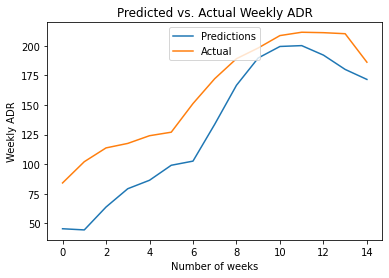

In [79]:
predictons, =plt.plot(ynewpd, label='Predictions')
actual, =plt.plot(actualpd, label='Actual')
plt.xlabel('Number of weeks')
plt.ylabel('Weekly ADR')
plt.title("Predicted vs. Actual Weekly ADR")
plt.legend(loc = 'upper center')
plt.show()

In [80]:
np.mean(actualpd)

160.492142162915